In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Re-initialize seed and set style
np.random.seed(47)
plt.style.use('dark_background')
plt.rcParams.update({
    'axes.titlesize': 16,    
    'axes.labelsize': 12,      
    'xtick.labelsize': 14,    
    'ytick.labelsize': 14,  
    'legend.fontsize': 14,        
})
# True mean of the underlying distribution
true_mu = 5

# Estimators
def unbiased_inconsistent_estimator(sample_size, true_mu):
    sample = np.random.normal(loc=true_mu, scale=1, size=sample_size)
    return sample[0]  # X_1 is used to estimate true_mu

def biased_consistent_estimator(sample_size, true_mu):
    sample = np.random.normal(loc=true_mu, scale=1, size=sample_size)
    estimator = (sample_size / (sample_size + 1)) * np.mean(sample)
    return estimator

In [2]:
# Simulation for checking unbiasedness: Keep sample size fixed
sample_size = 5
n_simulations = 500
unbiased_estimates = [
    unbiased_inconsistent_estimator(sample_size, true_mu) 
    for _ in range(n_simulations)
]

# Simulation for checking consistency: Increase sample size 
consistent_estimates = [
    biased_consistent_estimator(sample_size, true_mu) 
    for sample_size in range(1, n_simulations + 1)
]

avg_unbiased = np.mean(unbiased_estimates)
last_biased = consistent_estimates[-1]

print(f'Arithmetic avg. of all unbiased estimates: {avg_unbiased}')
print(f'Sample mean of the last sample (biased): {last_biased}')

Arithmetic avg. of all unbiased estimates: 4.992122475341306
Sample mean of the last sample (biased): 4.999915438548363


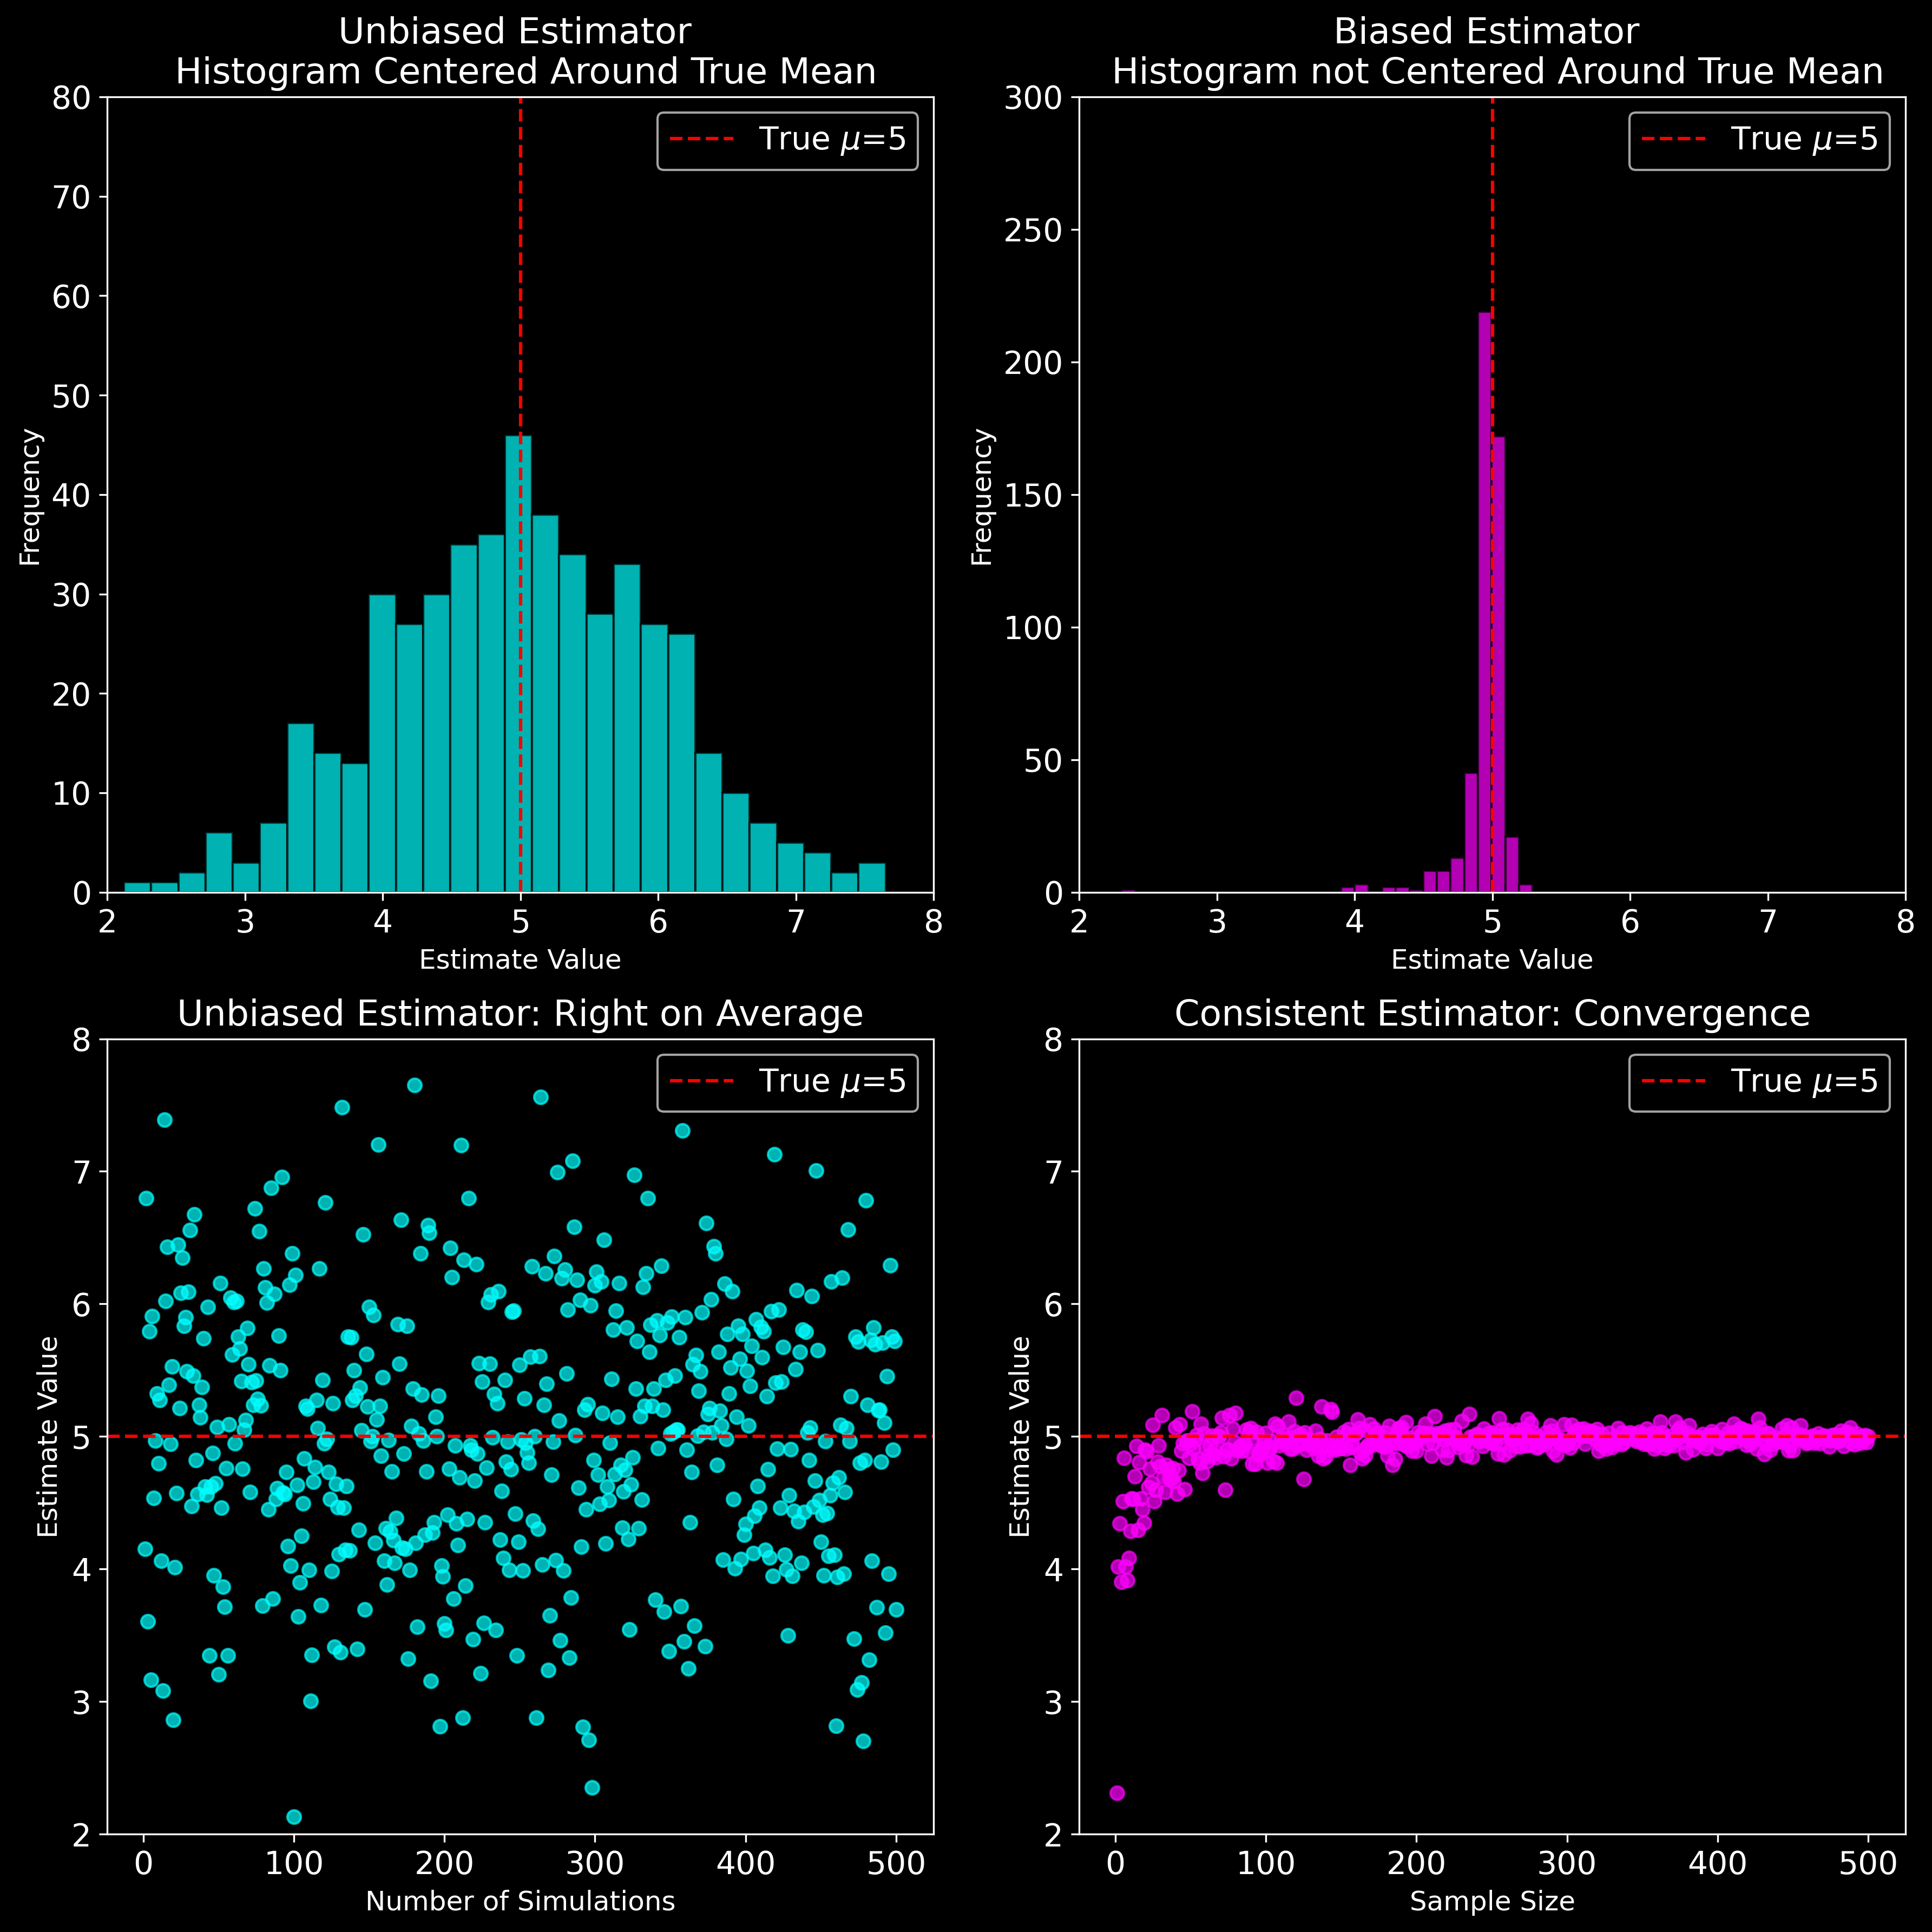

In [3]:
# Setting consistent x and y limits for better comparison
x_limits = (true_mu - 3, true_mu + 3)
y_limits_scatter = (true_mu - 3, true_mu + 3)

# Plotting with fixed limits
fig, axs = plt.subplots(2, 2, figsize=(12, 12), dpi=300)

# Visualization-1: Histogram for unbiased_but_inconsistent estimator with true_mu
axs[0, 0].hist(unbiased_estimates, bins=30, alpha=0.7, color='cyan', edgecolor='black', density=False)
axs[0, 0].axvline(true_mu, color='red', linestyle='--', label=f'True $\mu$={true_mu}')
axs[0, 0].set_xlim(x_limits)
axs[0, 0].set_ylim((0, 80))
axs[0, 0].set_title("Unbiased Estimator \n Histogram Centered Around True Mean")
axs[0, 0].set_xlabel("Estimate Value")
axs[0, 0].set_ylabel("Frequency")
axs[0, 0].legend()

# Visualization-2: Histogram for biased_but_consistent estimator with true_mu
axs[0, 1].hist(consistent_estimates, bins=30, alpha=0.7, color='magenta', edgecolor='black', density=False)
axs[0, 1].axvline(true_mu, color='red', linestyle='--', label=f'True $\mu$={true_mu}')
axs[0, 1].set_xlim(x_limits)
axs[0, 1].set_ylim((0, 300))
axs[0, 1].set_title("Biased Estimator \n Histogram not Centered Around True Mean")
axs[0, 1].set_xlabel("Estimate Value")
axs[0, 1].set_ylabel("Frequency")
axs[0, 1].legend()

# Visualization-3: Scatter plot of num simulations vs unbiased_but_inconsistent estimates
axs[1, 0].scatter(range(1, n_simulations + 1), unbiased_estimates, color='cyan', alpha=0.7)
axs[1, 0].axhline(true_mu, color='red', linestyle='--', label=f'True $\mu$={true_mu}')
axs[1, 0].set_ylim(y_limits_scatter)
axs[1, 0].set_title("Unbiased Estimator: Right on Average")
axs[1, 0].set_xlabel("Number of Simulations")
axs[1, 0].set_ylabel("Estimate Value")
axs[1, 0].legend()

# Visualization-4: Scatter plot of sample_size vs biased_but_consistent estimates
axs[1, 1].scatter(range(1, n_simulations + 1), consistent_estimates, color='magenta', alpha=0.7)
axs[1, 1].axhline(true_mu, color='red', linestyle='--', label=f'True $\mu$={true_mu}')
axs[1, 1].set_ylim(y_limits_scatter)
axs[1, 1].set_title("Consistent Estimator: Convergence")
axs[1, 1].set_xlabel("Sample Size")
axs[1, 1].set_ylabel("Estimate Value")
axs[1, 1].legend()

# Adjust layout
plt.tight_layout()
plt.show()

**1. Unbiased Estimator**
An estimator is **unbiased** if its expected value equals the true parameter value. Formally, for an estimator $\hat{\theta}$ of a parameter $\theta$,  
<p style="text-align: center;">        $\mathbb{E}[\hat{\theta}] = \theta$. </p>

**2. Consistent Estimator**
An estimator is **consistent** if it converges in probability to the true parameter as the sample size increases. Formally, $\hat{\theta}_n$ is consistent for $\theta$ if:  
<p style="text-align: center;">          $\lim_{n \to \infty} P(|\hat{\theta}_n - \theta| < \epsilon) = 1 \quad \text{for any } \epsilon > 0$. </p>

# **Notes on Unbiased and Consistent Estimators**

---

## **1. Unbiased Estimator**
An estimator is **unbiased** if its expected value equals the true parameter value. Formally, for an estimator $\hat{\theta}$ of a parameter $\theta$,  
$\mathbb{E}[\hat{\theta}] = \theta$.

### **Key Characteristics**
- An unbiased estimator does not systematically overestimate or underestimate the parameter.
- It provides the "correct" value on average across repeated samples.
- However, unbiasedness does not guarantee that the estimator converges to the true parameter as the sample size increases (consistency).

### **Example**
- **Estimator:** $X_1$, the first observation from a sample of size $n$, for the mean of a normal distribution $\mathcal{N}(\mu, \sigma^2)$.
- **Unbiasedness:** The expected value of $X_1$ is:  
  $\mathbb{E}[X_1] = \mu$.  
  Thus, $X_1$ is an **unbiased estimator** of $\mu$.
- **Consistency:** Since $X_1$ does not depend on $n$, its variance ($\text{Var}(X_1) = \sigma^2$) does not decrease as $n \to \infty$. Therefore, $X_1$ is **not consistent**.

---

## **2. Consistent Estimator**
An estimator is **consistent** if it converges in probability to the true parameter as the sample size increases. Formally, $\hat{\theta}_n$ is consistent for $\theta$ if:  
$\lim_{n \to \infty} P(|\hat{\theta}_n - \theta| < \epsilon) = 1 \quad \text{for any } \epsilon > 0$.

### **Key Characteristics**
- A consistent estimator becomes arbitrarily close to the true parameter value as the sample size grows.
- Consistency often depends the variance of the estimator shrinking as $n \to \infty$.

### **Example**
- **Estimator:** $\frac{n}{n+1} \bar{X}$, where $\bar{X}$ is the sample mean.
- **Unbiasedness:** The expected value of $\frac{n}{n+1} \bar{X}$ is:  
  $\mathbb{E}\left[\frac{n}{n+1} \bar{X}\right] = \frac{n}{n+1} \mu$,  
  which shows that this estimator is **biased** (bias = $-\frac{\mu}{n+1}$).
- **Consistency:** As $n \to \infty$, the bias goes to $0$, and the variance of $\bar{X}$ ($\frac{\sigma^2}{n}$) ensures convergence to $\mu$. Thus, $\frac{n}{n+1} \bar{X}$ is **consistent**.

---

## **Comparison Table**

| Property               | $X_1$                        | $\frac{n}{n+1} \bar{X}$             |
|------------------------|------------------------------|-------------------------------------|
| **Unbiasedness**       | Yes ($\mathbb{E}[X_1] = \mu$) | No ($\mathbb{E}[\hat{\mu}] \neq \mu$) |
| **Consistency**        | No (does not converge to $\mu$) | Yes (converges to $\mu$ as $n \to \infty$) |
| **Bias**               | $0$                          | $-\frac{\mu}{n+1}$                  |

---